## Import Modules

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
paths = []
labels = []

for dirname, _, filenames in os.walk('dataset'):
    for filename in filenames:
        if not filename.startswith('.DS_Store'):  
            paths.append(os.path.join(dirname, filename))
            label = filename.split('_')[-1]
            label = label.split('.')[0]
            labels.append(label.lower())
    
        if len(paths) == 2800:
            break

print('Dataset is Loaded')


Dataset is Loaded


In [3]:
len(paths)

5600

In [4]:
paths[:5]

['dataset/YAF_disgust/YAF_date_disgust.wav',
 'dataset/YAF_disgust/YAF_rag_disgust.wav',
 'dataset/YAF_disgust/YAF_raise_disgust.wav',
 'dataset/YAF_disgust/YAF_ditch_disgust.wav',
 'dataset/YAF_disgust/YAF_door_disgust.wav']

In [5]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [6]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,dataset/YAF_disgust/YAF_date_disgust.wav,disgust
1,dataset/YAF_disgust/YAF_rag_disgust.wav,disgust
2,dataset/YAF_disgust/YAF_raise_disgust.wav,disgust
3,dataset/YAF_disgust/YAF_ditch_disgust.wav,disgust
4,dataset/YAF_disgust/YAF_door_disgust.wav,disgust


In [7]:
df['label'].value_counts()

disgust    800
ps         800
happy      800
sad        800
neutral    800
fear       800
angry      800
Name: label, dtype: int64

## Exploratory Data Analysis

<AxesSubplot:xlabel='label', ylabel='count'>

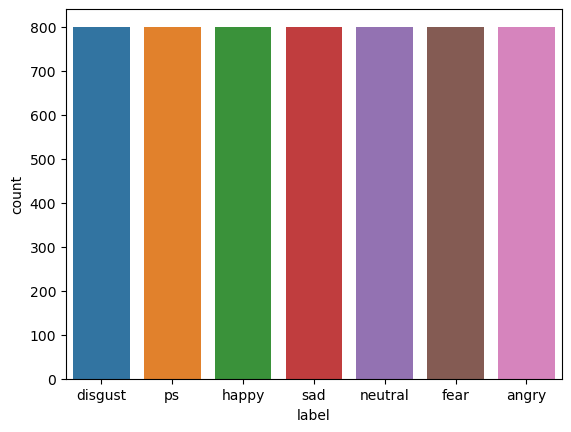

In [8]:
sns.countplot(data=df, x='label')

In [9]:
def waveplot(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

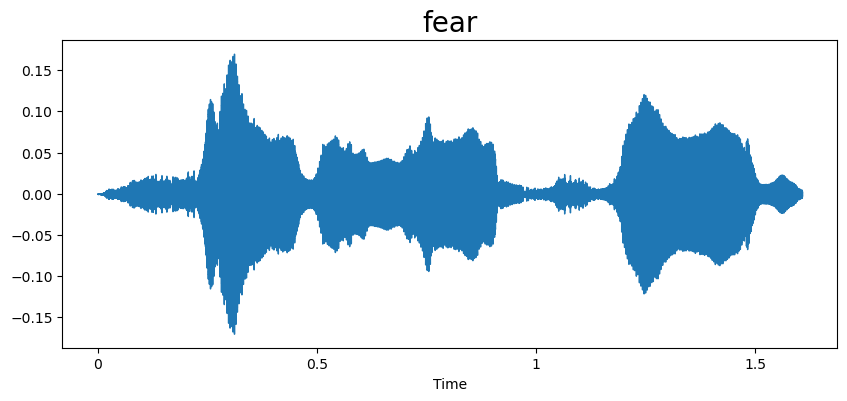

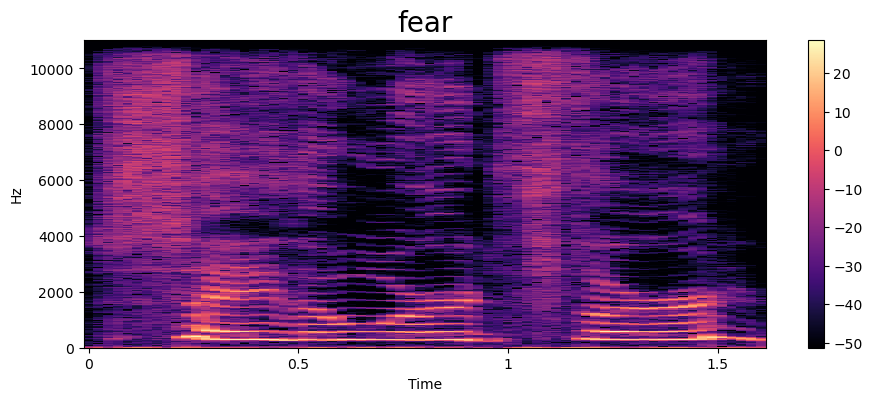

In [10]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

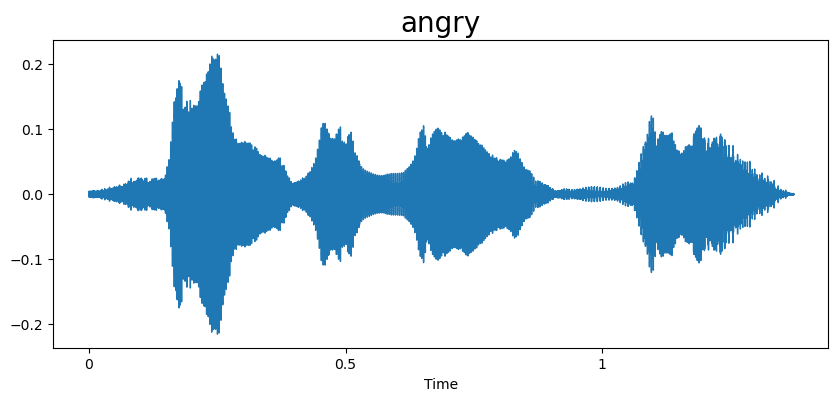

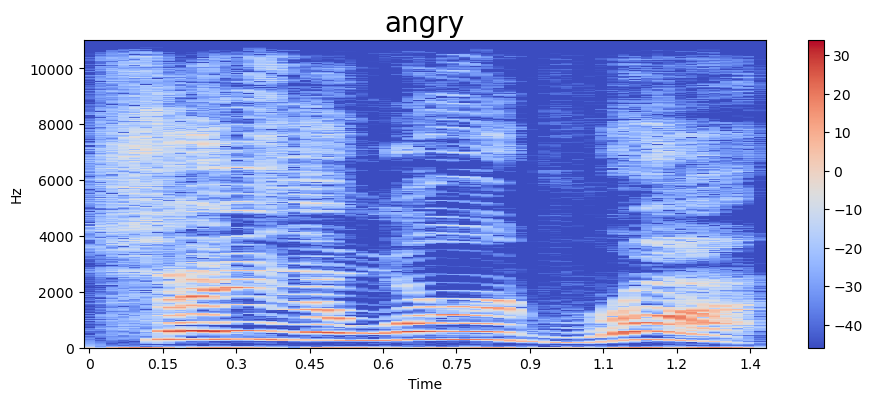

In [11]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

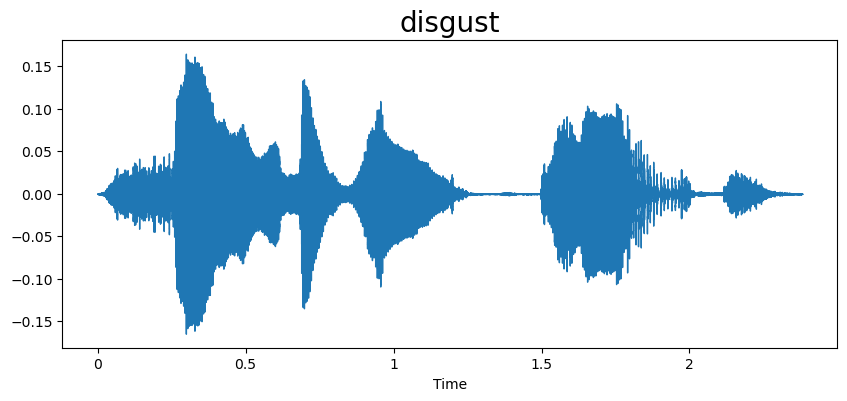

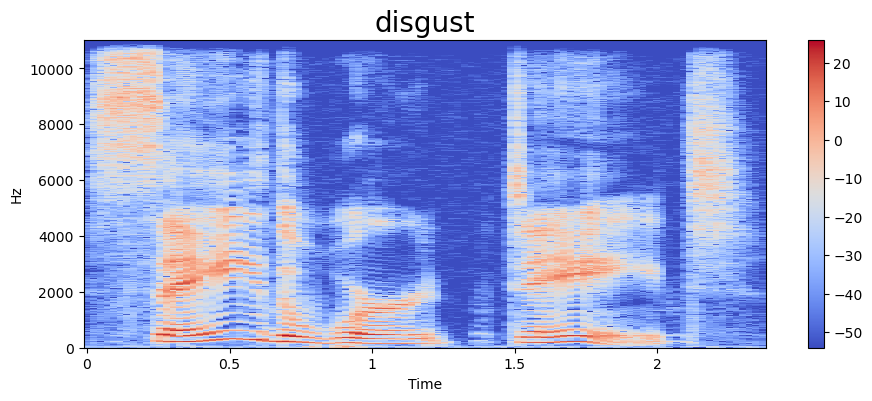

In [12]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

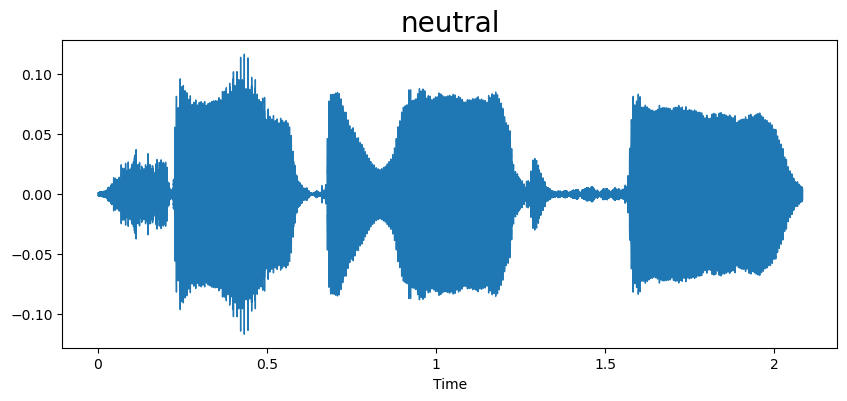

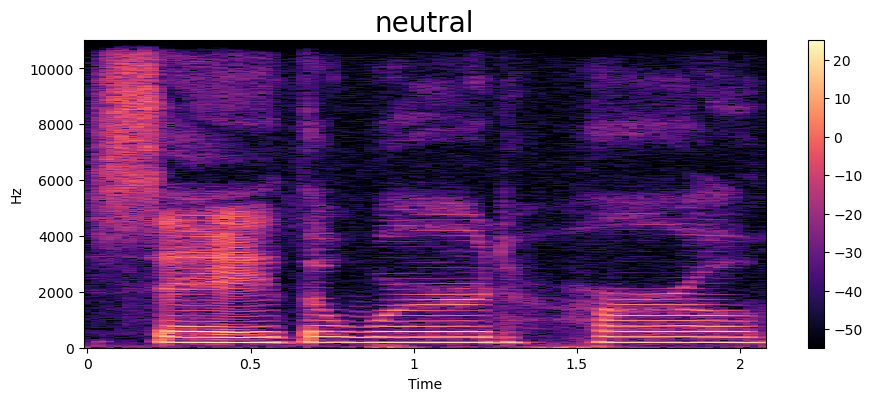

In [13]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

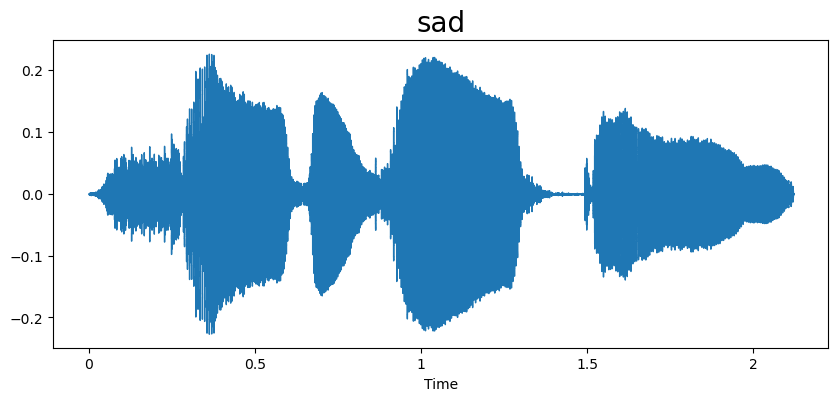

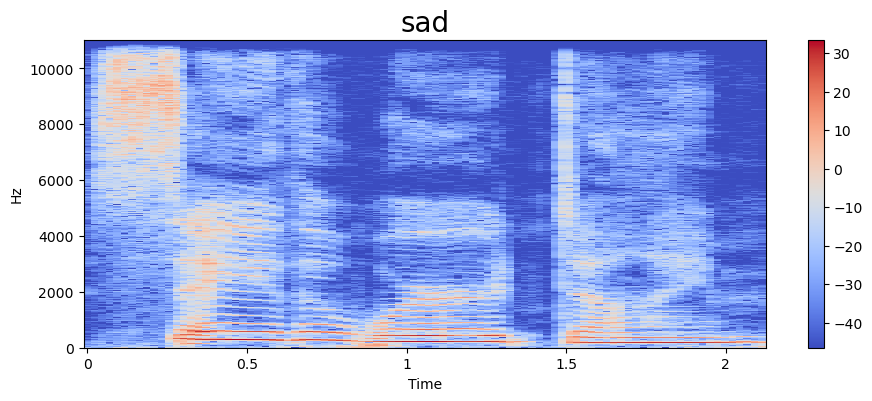

In [14]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

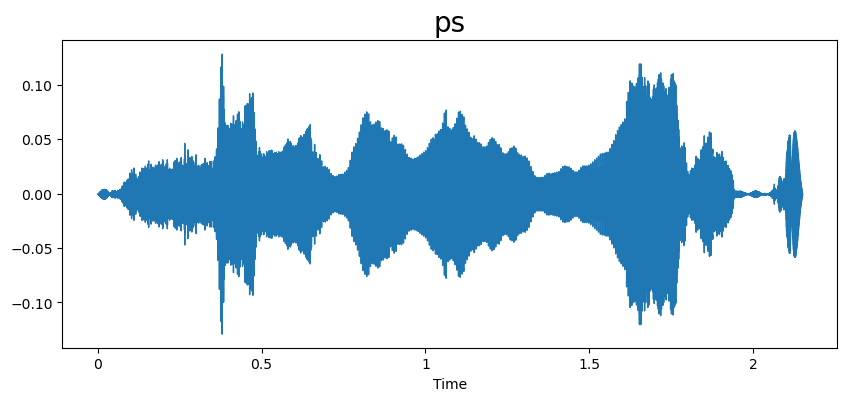

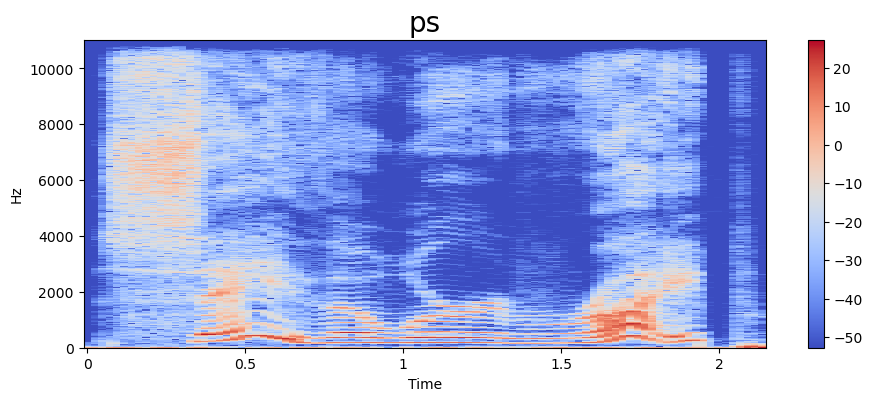

In [15]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

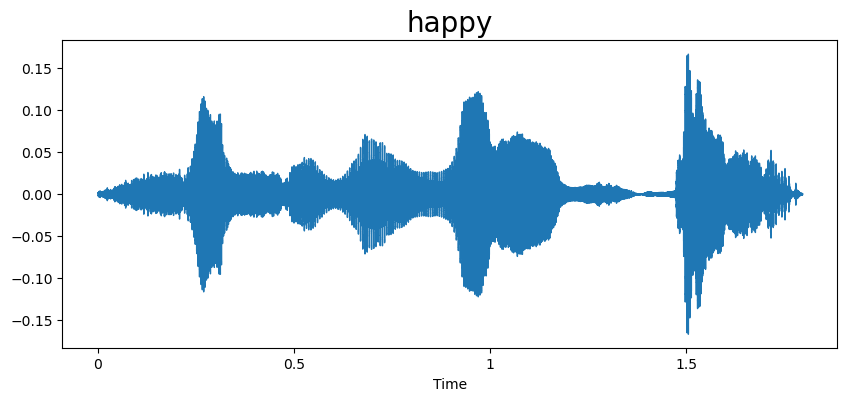

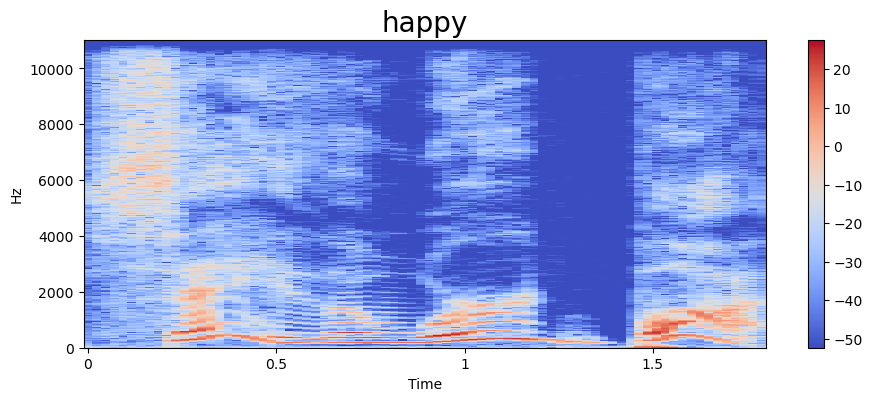

In [16]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveplot(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

## Feature Extraction

In [17]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [18]:
extract_mfcc(df['speech'][0])

array([-4.4636792e+02,  7.3789307e+01,  1.5521718e+00,  4.0626896e+01,
       -8.4494534e+00, -2.9341393e+00, -6.6822028e+00, -1.7199314e+01,
       -5.6114125e+00, -1.3409514e+01, -7.3893209e+00,  6.8370872e+00,
       -1.0458900e+01,  3.2033248e+00, -1.0037696e+00, -5.6148534e+00,
        4.2504101e+00, -1.1169558e+00, -9.1154451e+00,  2.1831040e+00,
       -7.7419267e+00,  6.4607871e-01, -3.6939952e+00,  3.7297657e-01,
       -2.0016890e+00, -1.8217638e+00, -2.7837276e+00,  2.8430924e+00,
       -3.0322781e+00,  4.5028729e+00, -8.8743961e-01,  4.2168193e+00,
        1.7408412e+00,  3.8251693e+00,  4.3130198e+00,  3.1095669e+00,
        3.5192683e+00,  4.1317463e+00,  2.2578502e+00,  2.3055403e+00],
      dtype=float32)

In [19]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))

In [20]:
X_mfcc

0       [-446.36792, 73.78931, 1.5521718, 40.626896, -...
1       [-383.37564, 108.15568, -17.578175, 15.888096,...
2       [-404.0382, 87.21106, 0.4870203, 22.224413, -8...
3       [-444.80597, 67.52622, -3.808903, 31.318573, -...
4       [-430.42755, 118.75985, 6.9652796, 5.204931, -...
                              ...                        
5595    [-574.7826, 95.66922, 34.85124, 16.821632, 17....
5596    [-557.9271, 89.87658, 33.661488, 15.339761, 22...
5597    [-527.0877, 115.282486, 26.17239, 7.6268435, 1...
5598    [-560.78094, 121.283714, 40.302486, -1.9568781...
5599    [-552.6838, 106.72334, 35.1727, 8.060722, 22.6...
Name: speech, Length: 5600, dtype: object

In [21]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(5600, 40)

In [22]:
## input split
X = np.expand_dims(X, -1)
X.shape

(5600, 40, 1)

In [23]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [24]:
y = y.toarray()

In [25]:
y.shape

(5600, 7)

## Create the LSTM Model

In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 256)               264192    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 4

In [27]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50


2024-01-24 17:08:02.095217: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


70/70 [==============================] - 14s 172ms/step - loss: 0.8286 - accuracy: 0.6788 - val_loss: 0.3794 - val_accuracy: 0.8705
Epoch 2/50
70/70 [==============================] - 10s 140ms/step - loss: 0.2133 - accuracy: 0.9344 - val_loss: 0.1508 - val_accuracy: 0.9393
Epoch 3/50
70/70 [==============================] - 10s 149ms/step - loss: 0.1596 - accuracy: 0.9487 - val_loss: 0.1611 - val_accuracy: 0.9482
Epoch 4/50
70/70 [==============================] - 10s 149ms/step - loss: 0.1272 - accuracy: 0.9621 - val_loss: 0.1606 - val_accuracy: 0.9473
Epoch 5/50
70/70 [==============================] - 9s 134ms/step - loss: 0.1254 - accuracy: 0.9607 - val_loss: 0.1163 - val_accuracy: 0.9563
Epoch 6/50
70/70 [==============================] - 10s 145ms/step - loss: 0.0890 - accuracy: 0.9734 - val_loss: 0.0777 - val_accuracy: 0.9714
Epoch 7/50
70/70 [==============================] - 9s 131ms/step - loss: 0.0754 - accuracy: 0.9754 - val_loss: 0.1317 - val_accuracy: 0.9589
Epoch 8/50
7

In [28]:
# best val accuracy: 72.32
# use checkpoint to save the best val accuracy model
# adjust learning rate for slow convergence

## Plot the results

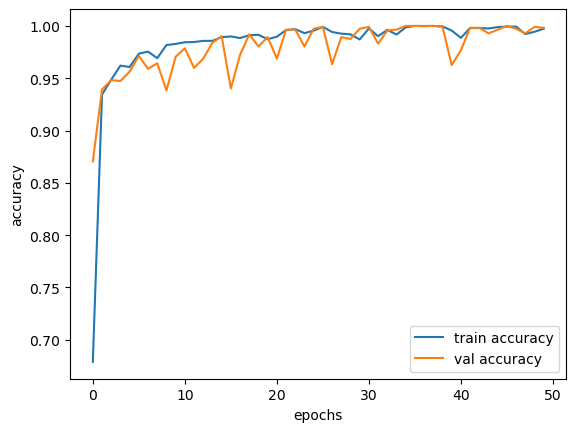

In [29]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

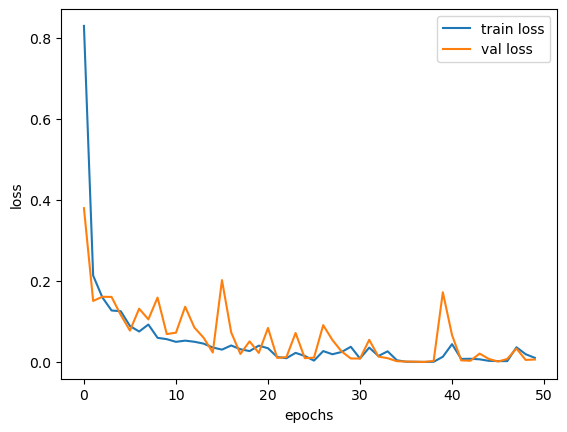

In [30]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [31]:
# Save the trained model
model.save('emotion_model.h5')